In [40]:
from nilearn.image import mean_img, resample_img, smooth_img
from nilearn.plotting import plot_anat
from nilearn.image import math_img 
from nilearn.plotting import plot_epi
import nibabel as nib 
from nilearn.plotting import plot_anat, plot_epi 
import os

In [2]:
data_path = "C:\\Users\\kuttysidtej\\Desktop\\Full-Dataset\\sub-03"

In [24]:
func_img_path = "C:\\Users\\kuttysidtej\\Desktop\\Full-Dataset\\sub-03\\func\\sub-03_task-speech_bold.nii.gz"
func_img = nib.load(func_img_path) 


In [21]:
discarded_img = math_img('img[..., 5:]', img=func_img)

In [11]:
mean_func_img = mean_img(discarded_img)
motion_corrected_img = smooth_img(discarded_img, fwhm=5)

In [12]:
mni152_template = nib.load("C:\\Users\\kuttysidtej\\Desktop\\MNI152_T1_2mm_brain.nii.gz")
resampled_mean_func_img = resample_img(mean_func_img, target_affine=mni152_template.affine,
                                      target_shape=mni152_template.shape)


In [13]:
brain_mask_img = math_img('img > 1000', img=resampled_mean_func_img)

In [25]:
smoothed_img = smooth_img(resampled_mean_func_img, fwhm=5)


In [38]:
middle_volume_idx = func_img.shape[-1] // 2 
print(f"func_img.shape[-1]: {func_img.shape[-1]}")
print(f"middle_volume_idx: {middle_volume_idx}")


func_img.shape[-1]: 341
middle_volume_idx: 170


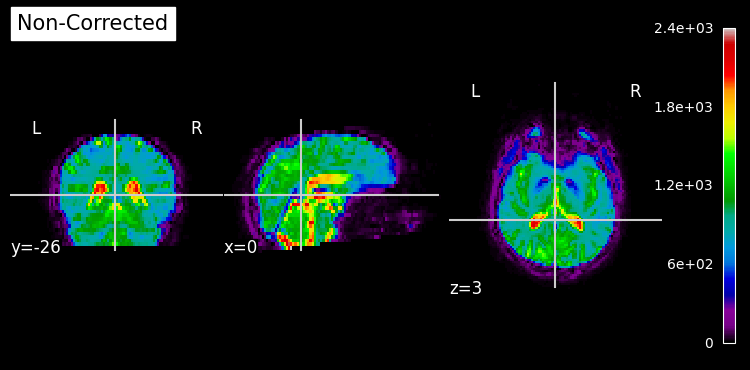

In [33]:
plot_epi(discarded_img.slicer[..., middle_volume_idx], title="Non-Corrected", display_mode="ortho", cut_coords=None, colorbar=True)
plt.show()

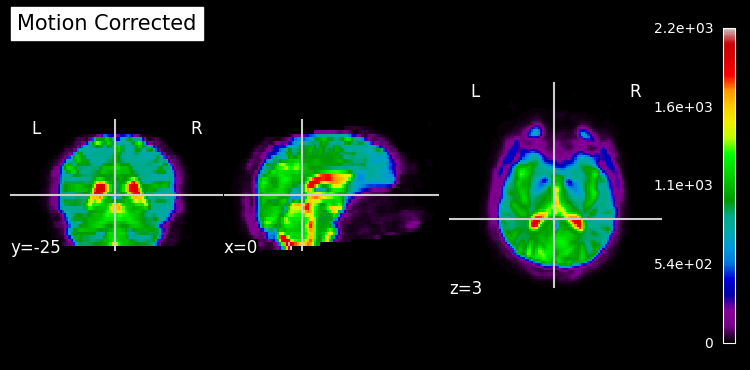

In [34]:
plot_epi(motion_corrected_img.slicer[..., middle_volume_idx], title="Motion Corrected", display_mode="ortho", cut_coords=None, colorbar=True)
plt.show()

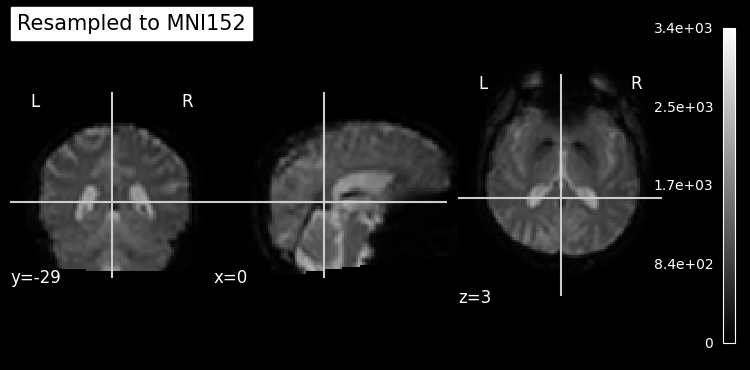

In [35]:
plot_anat(resampled_mean_func_img, title="Resampled to MNI152", display_mode="ortho", cut_coords=None, colorbar=True)
plt.show()

In [41]:
nib.save(motion_corrected_img, os.path.join(data_path, "motion_corrected_data.nii.gz"))

In [42]:
nib.save(resampled_mean_func_img, os.path.join(data_path, "resampled_data.nii.gz"))

In [ ]:
nib.save(brain_mask_img, os.path.join(data_path, "brain_mask_data.nii.gz"))